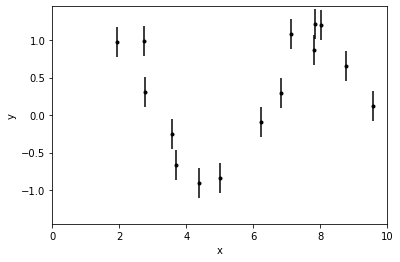

In [5]:
import numpy as np
import matplotlib.pyplot as pl
from george import kernels
import george
from scipy.signal import lombscargle


np.random.seed(1234)
x = 10 * np.sort(np.random.rand(15))
yerr = 0.2 * np.ones_like(x)
y = np.sin(x) + yerr * np.random.randn(len(x))

pl.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
pl.xlim(0, 10)
pl.ylim(-1.45, 1.45)
pl.xlabel("x")
pl.ylabel("y");

In [6]:
f = np.linspace(0.001, 2, 1000)

In [7]:
pgram = lombscargle(x, y, f)

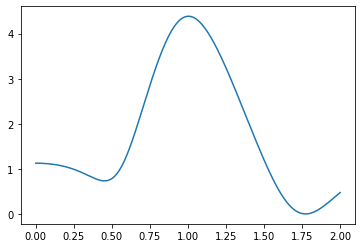

In [9]:
pl.plot(f, pgram);

In [10]:
peak_i = np.where(np.r_[True, pgram[1:] > pgram[:-1]] & np.r_[pgram[:-1] > pgram[1:], True])[0]

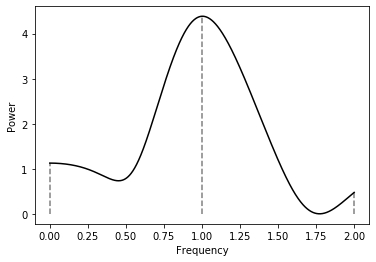

In [12]:
peak_f = f[peak_i]
peak_p = pgram[peak_i]
pl.plot(f, pgram, c='k');
pl.xlabel("Frequency")
pl.ylabel("Power")
pl.vlines(peak_f, 0, peak_p, linestyle='--', colors='gray');

In [ ]:
an

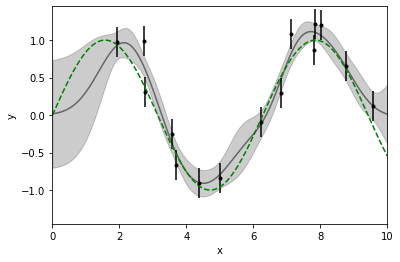

In [4]:

kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
gp = george.GP(kernel)
gp.compute(x, yerr)

x_pred = np.linspace(0, 10, 500)
pred, pred_var = gp.predict(y, x_pred, return_var=True)

pl.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
pl.plot(x_pred, np.sin(x_pred), "--g")
pl.xlim(0, 10)
pl.ylim(-1.45, 1.45)
pl.xlabel("x")
pl.ylabel("y");